In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics

In [2]:
ehull_e3nn_unrelaxed_test = pd.read_json("../../best_models/e3nn/dft_e_hull_htvs_data_unrelaxed_e3nn/837627/best_0/test_set_predictions.json")
ehull_e3nn_relaxed_test = pd.read_json("../../best_models/e3nn/dft_e_hull_htvs_data_relaxed_e3nn/837628/best_0/test_set_predictions.json")

ehull_CGCNN_unrelaxed_test = pd.read_json("../../best_models/CGCNN/dft_e_hull_htvs_data_unrelaxed_CGCNN/837611/best_0/test_set_predictions.json")
ehull_CGCNN_relaxed_test = pd.read_json("../../best_models/CGCNN/dft_e_hull_htvs_data_relaxed_CGCNN/837612/best_0/test_set_predictions.json")

ehull_CGCNN_M3GNET_test = pd.read_json("../../best_models/CGCNN/dft_e_hull_htvs_data_M3Gnet_relaxed_CGCNN/837613/best_0/test_set_predictions.json")
ehull_e3nn_M3GNET_test = pd.read_json("../../best_models/e3nn/dft_e_hull_htvs_data_M3Gnet_relaxed_e3nn/837629/best_0/test_set_predictions.json")

ehull_PAINN_unrelaxed_test = pd.read_json("../../best_models/Painn/dft_e_hull_htvs_data_unrelaxed_Painn/837609/best_0/test_set_predictions.json")

ehull_e3nn_unrelaxed_held_B = pd.read_json("../../best_models/e3nn/dft_e_hull_htvs_data_unrelaxed_e3nn/837627/best_0/holdout_set_B_sites_predictions.json")
ehull_e3nn_relaxed_held_B = pd.read_json("../../best_models/e3nn/dft_e_hull_htvs_data_relaxed_e3nn/837628/best_0/holdout_set_B_sites_predictions.json")

ehull_CGCNN_unrelaxed_held_B = pd.read_json("../../best_models/CGCNN/dft_e_hull_htvs_data_unrelaxed_CGCNN/837611/best_0/holdout_set_B_sites_predictions.json")
ehull_CGCNN_relaxed_held_B = pd.read_json("../../best_models/CGCNN/dft_e_hull_htvs_data_relaxed_CGCNN/837612/best_0/holdout_set_B_sites_predictions.json")

ehull_CGCNN_M3GNET_held_B = pd.read_json("../../best_models/CGCNN/dft_e_hull_htvs_data_M3Gnet_relaxed_CGCNN/837613/best_0/holdout_set_B_sites_predictions.json")
ehull_e3nn_M3GNET_held_B = pd.read_json("../../best_models/e3nn/dft_e_hull_htvs_data_M3Gnet_relaxed_e3nn/837629/best_0/holdout_set_B_sites_predictions.json")

ehull_PAINN_unrelaxed_held_B = pd.read_json("../../best_models/Painn/dft_e_hull_htvs_data_unrelaxed_Painn/837609/best_0/holdout_set_B_sites_predictions.json")

ehull_e3nn_unrelaxed_held_series = pd.read_json("../../best_models/e3nn/dft_e_hull_htvs_data_unrelaxed_e3nn/837627/best_0/holdout_set_series_predictions.json")
ehull_e3nn_relaxed_held_series = pd.read_json("../../best_models/e3nn/dft_e_hull_htvs_data_relaxed_e3nn/837628/best_0/holdout_set_series_predictions.json")

ehull_CGCNN_unrelaxed_held_series = pd.read_json("../../best_models/CGCNN/dft_e_hull_htvs_data_unrelaxed_CGCNN/837611/best_0/holdout_set_series_predictions.json")
ehull_CGCNN_relaxed_held_series = pd.read_json("../../best_models/CGCNN/dft_e_hull_htvs_data_relaxed_CGCNN/837612/best_0/holdout_set_series_predictions.json")

ehull_CGCNN_M3GNET_held_series = pd.read_json("../../best_models/CGCNN/dft_e_hull_htvs_data_M3Gnet_relaxed_CGCNN/837613/best_0/holdout_set_series_predictions.json")
ehull_e3nn_M3GNET_held_series = pd.read_json("../../best_models/e3nn/dft_e_hull_htvs_data_M3Gnet_relaxed_e3nn/837629/best_0/holdout_set_series_predictions.json")

ehull_PAINN_unrelaxed_held_series = pd.read_json("../../best_models/Painn/dft_e_hull_htvs_data_unrelaxed_Painn/837609/best_0/holdout_set_series_predictions.json")


In [3]:
ehull_e3nn_unrelaxed_test

,formula,framework,composition,n_atoms_unrelaxed,n_atoms_opt,unrelaxed_cryst_id,unrelaxed_struct,opt_cryst_id,opt_struct,es_job_id,dft_energy,dft_energy_per_atom,dft_e_hull,Op_band_center,M3Gnet_relaxed_struct,M3Gnet_relaxed_energy,M3Gnet_relaxed_energy_per_atom,idx,predicted_dft_e_hull
0,Ba2Cr4Mn4O24Pr6,Ba0.250Pr0.750Cr0.500Mn0.500O3,"{'sites': {'A': ['Ba', 'Pr'], 'B': ['Cr', 'Mn'...",40,40,200879856,"{'@module': 'pymatgen.core.structure', '@class...",419905109,"{'@module': 'pymatgen.core.structure', '@class...",122894567,-308.596056,-7.714901,0.089063,-2.242520,"{'@module': 'pymatgen.core.structure', '@class...",-309.184143,-7.729604,0,0.087419
1,Ba2Cr4Mn4O24Pr6,Ba0.250Pr0.750Cr0.500Mn0.500O3,"{'sites': {'A': ['Ba', 'Pr'], 'B': ['Cr', 'Mn'...",40,40,201883019,"{'@module': 'pymatgen.core.structure', '@class...",423959303,"{'@module': 'pymatgen.core.structure', '@class...",123103478,-309.312393,-7.732810,0.071154,-2.087915,"{'@module': 'pymatgen.core.structure', '@class...",-309.746582,-7.743665,1,0.074756
2,Ba2Fe4Ni4O24Pr6,Ba0.250Pr0.750Fe0.500Ni0.500O3,"{'sites': {'A': ['Pr', 'Ba'], 'B': ['Fe', 'Ni'...",40,40,222996848,"{'@module': 'pymatgen.core.structure', '@class...",419905248,"{'@module': 'pymatgen.core.structure', '@class...",122894599,-266.957499,-6.673937,0.081011,-1.430620,"{'@module': 'pymatgen.core.structure', '@class...",-267.800110,-6.695003,2,0.095661
3,Ba2Fe4Ni4O24Pr6,Ba0.250Pr0.750Fe0.500Ni0.500O3,"{'sites': {'A': ['Pr', 'Ba'], 'B': ['Fe', 'Ni'...",40,40,222996849,"{'@module': 'pymatgen.core.structure', '@class...",420168914,"{'@module': 'pymatgen.core.structure', '@class...",122914674,-266.598455,-6.664961,0.089987,-1.425103,"{'@module': 'pymatgen.core.structure', '@class...",-268.465729,-6.711643,3,0.084270
4,Ba3Ca5Co1Ni7O24,Ba0.375Ca0.625Co0.125Ni0.875O3,"{'sites': {'A': ['Ba', 'Ca'], 'B': ['Co', 'Ni'...",40,40,222996910,"{'@module': 'pymatgen.core.structure', '@class...",419905120,"{'@module': 'pymatgen.core.structure', '@class...",122894577,-212.382680,-5.309567,0.270616,-1.417654,"{'@module': 'pymatgen.core.structure', '@class...",-214.583847,-5.364596,4,0.269292
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,Cu4Mn4O24Y8,YCu0.500Mn0.500O3,"{'sites': {'A': ['Y'], 'B': ['Cu', 'Mn'], 'X':...",40,40,272062453,"{'@module': 'pymatgen.core.structure', '@class...",421466164,"{'@module': 'pymatgen.core.structure', '@class...",122979645,-307.787699,-7.694692,0.086401,-2.161081,"{'@module': 'pymatgen.core.structure', '@class...",-307.923126,-7.698078,1256,0.114688
1257,Cu4Mn4O24Y8,YCu0.500Mn0.500O3,"{'sites': {'A': ['Y'], 'B': ['Cu', 'Mn'], 'X':...",40,40,272062454,"{'@module': 'pymatgen.core.structure', '@class...",421562098,"{'@module': 'pymatgen.core.structure', '@class...",122988181,-307.783492,-7.694587,0.086506,-2.268117,"{'@module': 'pymatgen.core.structure', '@class...",-307.324310,-7.683108,1257,0.103299
1258,Cu4Mn4O24Y8,YCu0.500Mn0.500O3,"{'sites': {'A': ['Y'], 'B': ['Cu', 'Mn'], 'X':...",40,40,272062455,"{'@module': 'pymatgen.core.structure', '@class...",421466146,"{'@module': 'pymatgen.core.structure', '@class...",122979642,-307.786145,-7.694654,0.086440,-2.347069,"{'@module': 'pymatgen.core.structure', '@class...",-308.308380,-7.707710,1258,0.105145
1259,Cu4Mn4O24Y8,YCu0.500Mn0.500O3,"{'sites': {'A': ['Y'], 'B': ['Cu', 'Mn'], 'X':...",40,40,272062457,"{'@module': 'pymatgen.core.structure', '@class...",421446133,"{'@module': 'pymatgen.core.structure', '@class...",122979075,-307.668685,-7.691717,0.089376,-2.071618,"{'@module': 'pymatgen.core.structure', '@class...",-307.293976,-7.682349,1259,0.113349


In [4]:
def get_M3GNet(dataframe):
    predicted = dataframe.M3Gnet_relaxed_energy_per_atom
    dft = dataframe.dft_energy_per_atom
    
    print(np.mean(np.abs(dft-predicted)))
    print(metrics.r2_score(dft,predicted))
    

In [5]:
get_M3GNet(ehull_e3nn_unrelaxed_test)

NameError: name 'np' is not defined

In [ ]:
get_M3GNet(ehull_e3nn_unrelaxed_held_B)

In [ ]:
get_M3GNet(ehull_e3nn_unrelaxed_held_series)

In [ ]:
import numpy as np
import matplotlib as mpl
from sklearn import metrics
def get_direct_plot(dataframe,M3Gnet=False):
    
    predicted = dataframe.predicted_dft_e_hull
    dft = dataframe.dft_e_hull
    
    print(np.mean(np.abs(dft-predicted)))
    print(metrics.r2_score(dft,predicted))
    
    mpl.rcParams['axes.linewidth'] = 2.0

    orig_map=plt.cm.get_cmap('inferno')

    # reversing the original colormap using reversed() function
    cmap = orig_map.reversed()
    im = plt.hexbin(dft,predicted,cmap=cmap,gridsize=30,mincnt=1)
    plt.plot(np.linspace(-0.05,0.4,100),np.linspace(-0.05,0.4,100),c="black",linestyle="--")
    ax = plt.gca()
    ax.set_aspect('equal', adjustable='box')

    plt.xlim(-0.05,0.4)
    plt.ylim(-0.05,0.4)


    plt.xlabel("DFT E$_{hull}$ (eV/atom)",size=28)
    plt.ylabel("ML E$_{hull}$ (eV/atom)",size=28)
    plt.xticks([0.0,0.25],size=26)
    plt.yticks([0.0,0.25],size=26)
    #im.figure.axes[0].tick_params(axis="both", labelsize=15)

    cbar = plt.colorbar()
    cbar.set_ticks(ticks = [0,20],labels=[0,20],fontsize=28)
    cbar.set_label(label="Count",size=28)
    plt.savefig("tmp_fig.pdf",bbox_inches="tight")

In [ ]:
get_direct_plot(ehull_CGCNN_M3GNET_held_series,False)

In [ ]:
def get_emsemble_plot(path,target,M3Gnet=False):
    
    
    dataframe_one = pd.read_json(path+"best_0"+target)
    dataframe_two = pd.read_json(path+"best_1"+target)
    dataframe_three = pd.read_json(path+"best_2"+target)
    
    predicted_one = dataframe_one.predicted_dft_e_hull
    predicted_two = dataframe_two.predicted_dft_e_hull
    predicted_three = dataframe_three.predicted_dft_e_hull
    predicted = (predicted_one+predicted_two+predicted_three)/3.0
    dft = dataframe_one.dft_e_hull
    
    print(np.mean(np.abs(dft-predicted)))
    print(metrics.r2_score(dft,predicted))
    
    mpl.rcParams['axes.linewidth'] = 2.0

    orig_map=plt.cm.get_cmap('inferno')

    # reversing the original colormap using reversed() function
    cmap = orig_map.reversed()
    im = plt.hexbin(dft,predicted,cmap=cmap,gridsize=20,mincnt=1)
    plt.plot(np.linspace(-0.05,0.4,100),np.linspace(-0.05,0.4,100),c="black",linestyle="--")
    ax = plt.gca()
    ax.set_aspect('equal', adjustable='box')

    plt.xlim(-0.05,0.4)
    plt.ylim(-0.05,0.4)


    plt.xlabel("DFT E$_{hull}$ (eV/atom)",size=28)
    plt.ylabel("ML E$_{hull}$ (eV/atom)",size=28)
    plt.xticks([0.0,0.25],size=26)
    plt.yticks([0.0,0.25],size=26)
    #im.figure.axes[0].tick_params(axis="both", labelsize=15)

    cbar = plt.colorbar()
    cbar.set_ticks(ticks = [0,20],labels=[0,20],fontsize=28)
    cbar.set_label(label="Count",size=28)
    plt.savefig("tmp_fig.pdf",bbox_inches="tight")

In [ ]:
#ehull_e3nn_unrelaxed_test = pd.read_json("../../best_models/e3nn/dft_e_hull_htvs_data_unrelaxed_e3nn/837627/best_0/test_set_predictions.json")
#ehull_e3nn_relaxed_test = pd.read_json("../../best_models/e3nn/dft_e_hull_htvs_data_relaxed_e3nn/837628/best_0/test_set_predictions.json")

#ehull_CGCNN_unrelaxed_test = pd.read_json("../../best_models/CGCNN/dft_e_hull_htvs_data_unrelaxed_CGCNN/837611/best_0/test_set_predictions.json")
#ehull_CGCNN_relaxed_test = pd.read_json("../../best_models/CGCNN/dft_e_hull_htvs_data_relaxed_CGCNN/837612/best_0/test_set_predictions.json")

#ehull_CGCNN_M3GNET_test = pd.read_json("../../best_models/CGCNN/dft_e_hull_htvs_data_M3Gnet_relaxed_CGCNN/837613/best_0/test_set_predictions.json")
#ehull_e3nn_M3GNET_test = pd.read_json("../../best_models/e3nn/dft_e_hull_htvs_data_M3Gnet_relaxed_e3nn/837629/best_0/test_set_predictions.json")

#ehull_PAINN_unrelaxed_test = pd.read_json("../../best_models/Painn/dft_e_hull_htvs_data_unrelaxed_Painn/837609/best_0/test_set_predictions.json")

#ehull_e3nn_unrelaxed_held_B = pd.read_json("../../best_models/e3nn/dft_e_hull_htvs_data_unrelaxed_e3nn/837627/best_0/holdout_set_B_sites_predictions.json")
#ehull_e3nn_relaxed_held_B = pd.read_json("../../best_models/e3nn/dft_e_hull_htvs_data_relaxed_e3nn/837628/best_0/holdout_set_B_sites_predictions.json")

#ehull_CGCNN_unrelaxed_held_B = pd.read_json("../../best_models/CGCNN/dft_e_hull_htvs_data_unrelaxed_CGCNN/837611/best_0/holdout_set_B_sites_predictions.json")
#ehull_CGCNN_relaxed_held_B = pd.read_json("../../best_models/CGCNN/dft_e_hull_htvs_data_relaxed_CGCNN/837612/best_0/holdout_set_B_sites_predictions.json")

#ehull_CGCNN_M3GNET_held_B = pd.read_json("../../best_models/CGCNN/dft_e_hull_htvs_data_M3Gnet_relaxed_CGCNN/837613/best_0/holdout_set_B_sites_predictions.json")
#ehull_e3nn_M3GNET_held_B = pd.read_json("../../best_models/e3nn/dft_e_hull_htvs_data_M3Gnet_relaxed_e3nn/837629/best_0/holdout_set_B_sites_predictions.json")

#ehull_PAINN_unrelaxed_held_B = pd.read_json("../../best_models/Painn/dft_e_hull_htvs_data_unrelaxed_Painn/837609/best_0/holdout_set_B_sites_predictions.json")

#ehull_e3nn_unrelaxed_held_series = pd.read_json("../../best_models/e3nn/dft_e_hull_htvs_data_unrelaxed_e3nn/837627/best_0/holdout_set_series_predictions.json")
#ehull_e3nn_relaxed_held_series = pd.read_json("../../best_models/e3nn/dft_e_hull_htvs_data_relaxed_e3nn/837628/best_0/holdout_set_series_predictions.json")

#ehull_CGCNN_unrelaxed_held_series = pd.read_json("../../best_models/CGCNN/dft_e_hull_htvs_data_unrelaxed_CGCNN/837611/best_0/holdout_set_series_predictions.json")
#ehull_CGCNN_relaxed_held_series = pd.read_json("../../best_models/CGCNN/dft_e_hull_htvs_data_relaxed_CGCNN/837612/best_0/holdout_set_series_predictions.json")

#ehull_CGCNN_M3GNET_held_series = pd.read_json("../../best_models/CGCNN/dft_e_hull_htvs_data_M3Gnet_relaxed_CGCNN/837613/best_0/holdout_set_series_predictions.json")
#ehull_e3nn_M3GNET_held_series = pd.read_json("../../best_models/e3nn/dft_e_hull_htvs_data_M3Gnet_relaxed_e3nn/837629/best_0/holdout_set_series_predictions.json")

#ehull_PAINN_unrelaxed_held_series = pd.read_json("../../best_models/Painn/dft_e_hull_htvs_data_unrelaxed_Painn/837609/best_0/holdout_set_series_predictions.json")


get_emsemble_plot("../../best_models/Painn/dft_e_hull_htvs_data_unrelaxed_Painn/837609/","/holdout_set_series_predictions.json")

In [40]:
def get_relative_vals(dataframe,vals):
    
    vals_gs = {}
    out_diffs = []
    
    for i in range(len(dataframe)):
        curr_formula = dataframe.iloc[i].formula
        if curr_formula in vals_gs:
            if vals[i] < vals_gs[curr_formula]:
                vals_gs[curr_formula] = vals[i]
        else:
            vals_gs[curr_formula] = vals[i]
        

    for i in range(len(dataframe)):
        curr_formula = dataframe.iloc[i].formula
        curr_val = vals[i] - vals_gs[curr_formula]
        out_diffs.append(curr_val)
        
        
    return np.asarray(out_diffs)

In [87]:
def get_relative_plot(dataframe,M3Gnet=False):
    
    if M3Gnet:
        predicted = get_relative_vals(dataframe,dataframe.M3Gnet_relaxed_energy_per_atom)
    else:
        predicted = get_relative_vals(dataframe,dataframe.predicted_dft_e_hull)
    dft = get_relative_vals(dataframe,dataframe.dft_e_hull)
    
    print(np.mean(np.abs(dft-predicted)))
    print(metrics.r2_score(dft,predicted))
    
    mpl.rcParams['axes.linewidth'] = 2.0

    orig_map=plt.cm.get_cmap('inferno')

    # reversing the original colormap using reversed() function
    cmap = orig_map.reversed()
    im = plt.hexbin(dft,predicted,cmap=cmap,gridsize=20,mincnt=1)
    plt.plot(np.linspace(-0.01,0.2,100),np.linspace(-0.01,0.2,100),c="black",linestyle="--")
    ax = plt.gca()
    ax.set_aspect('equal', adjustable='box')

    plt.xlim(-0.01,0.12)
    plt.ylim(-0.01,0.12)


    plt.xlabel("DFT E$_{hull}$ (eV/atom)",size=28)
    plt.ylabel("ML E$_{hull}$ (eV/atom)",size=28)
    plt.xticks([0.0,0.1],size=26)
    plt.yticks([0.0,0.1],size=26)
    #im.figure.axes[0].tick_params(axis="both", labelsize=15)

    cbar = plt.colorbar()
    plt.clim(0,20)
    cbar.set_ticks(ticks = [0,20],labels=[0,20],fontsize=28)
    cbar.set_label(label="Count",size=28)
    plt.savefig("tmp_fig.pdf",bbox_inches="tight")

In [107]:
def get_emsemble_relative_plot(path,target,M3Gnet=False):
    
    
    dataframe_one = pd.read_json(path+"best_0"+target)
    dataframe_two = pd.read_json(path+"best_1"+target)
    dataframe_three = pd.read_json(path+"best_2"+target)
    
    predicted_one = dataframe_one.predicted_dft_e_hull
    predicted_two = dataframe_two.predicted_dft_e_hull
    predicted_three = dataframe_three.predicted_dft_e_hull
    
    
    predicted = get_relative_vals(dataframe_one,(predicted_one+predicted_two+predicted_three)/3.0)
    dft = get_relative_vals(dataframe_one,dataframe_one.dft_e_hull)
    
    print(np.mean(np.abs(dft-predicted)))
    print(metrics.r2_score(dft,predicted))
    
    mpl.rcParams['axes.linewidth'] = 2.0

    orig_map=plt.cm.get_cmap('inferno')

    # reversing the original colormap using reversed() function
    cmap = orig_map.reversed()
    im = plt.hexbin(dft,predicted,cmap=cmap,gridsize=20,mincnt=1)
    plt.plot(np.linspace(-0.01,0.16,100),np.linspace(-0.01,0.16,100),c="black",linestyle="--")
    ax = plt.gca()
    ax.set_aspect('equal', adjustable='box')

    plt.xlim(-0.01,0.12)
    plt.ylim(-0.01,0.12)


    plt.xlabel("DFT E$_{hull}$ (eV/atom)",size=28)
    plt.ylabel("ML E$_{hull}$ (eV/atom)",size=28)
    plt.xticks([0.0,0.1],size=26)
    plt.yticks([0.0,0.1],size=26)
    #im.figure.axes[0].tick_params(axis="both", labelsize=15)

    cbar = plt.colorbar()
    plt.clim(0,20)
    cbar.set_ticks(ticks = [0,20],labels=[0,20],fontsize=28)
    cbar.set_label(label="Count",size=28)
    plt.savefig("tmp_fig.pdf",bbox_inches="tight")

In [83]:
#ehull_e3nn_unrelaxed_held_B = pd.read_json("../../best_models/e3nn/dft_e_hull_htvs_data_unrelaxed_e3nn/837627/best_0/holdout_set_B_sites_predictions.json")
#ehull_e3nn_relaxed_held_B = pd.read_json("../../best_models/e3nn/dft_e_hull_htvs_data_relaxed_e3nn/837628/best_0/holdout_set_B_sites_predictions.json")

#ehull_CGCNN_unrelaxed_held_B = pd.read_json("../../best_models/CGCNN/dft_e_hull_htvs_data_unrelaxed_CGCNN/837611/best_0/holdout_set_B_sites_predictions.json")
#ehull_CGCNN_relaxed_held_B = pd.read_json("../../best_models/CGCNN/dft_e_hull_htvs_data_relaxed_CGCNN/837612/best_0/holdout_set_B_sites_predictions.json")

#ehull_CGCNN_M3GNET_held_B = pd.read_json("../../best_models/CGCNN/dft_e_hull_htvs_data_M3Gnet_relaxed_CGCNN/837613/best_0/holdout_set_B_sites_predictions.json")
#ehull_e3nn_M3GNET_held_B = pd.read_json("../../best_models/e3nn/dft_e_hull_htvs_data_M3Gnet_relaxed_e3nn/837629/best_0/holdout_set_B_sites_predictions.json")

#ehull_PAINN_unrelaxed_held_B = pd.read_json("../../best_models/Painn/dft_e_hull_htvs_data_unrelaxed_Painn/837609/best_0/holdout_set_B_sites_predictions.json")

#ehull_e3nn_unrelaxed_held_series = pd.read_json("../../best_models/e3nn/dft_e_hull_htvs_data_unrelaxed_e3nn/837627/best_0/holdout_set_series_predictions.json")
#ehull_e3nn_relaxed_held_series = pd.read_json("../../best_models/e3nn/dft_e_hull_htvs_data_relaxed_e3nn/837628/best_0/holdout_set_series_predictions.json")

#ehull_CGCNN_unrelaxed_held_series = pd.read_json("../../best_models/CGCNN/dft_e_hull_htvs_data_unrelaxed_CGCNN/837611/best_0/holdout_set_series_predictions.json")
#ehull_CGCNN_relaxed_held_series = pd.read_json("../../best_models/CGCNN/dft_e_hull_htvs_data_relaxed_CGCNN/837612/best_0/holdout_set_series_predictions.json")

#ehull_CGCNN_M3GNET_held_series = pd.read_json("../../best_models/CGCNN/dft_e_hull_htvs_data_M3Gnet_relaxed_CGCNN/837613/best_0/holdout_set_series_predictions.json")
#ehull_e3nn_M3GNET_held_series = pd.read_json("../../best_models/e3nn/dft_e_hull_htvs_data_M3Gnet_relaxed_e3nn/837629/best_0/holdout_set_series_predictions.json")

#ehull_PAINN_unrelaxed_held_series = pd.read_json("../../best_models/Painn/dft_e_hull_htvs_data_unrelaxed_Painn/837609/best_0/holdout_set_series_predictions.json")


In [84]:
import matplotlib as mpl


0.014085898281666665
0.2851331589610119


/tmp/ipykernel_2323408/3214583264.py:14: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  orig_map=plt.cm.get_cmap('inferno')


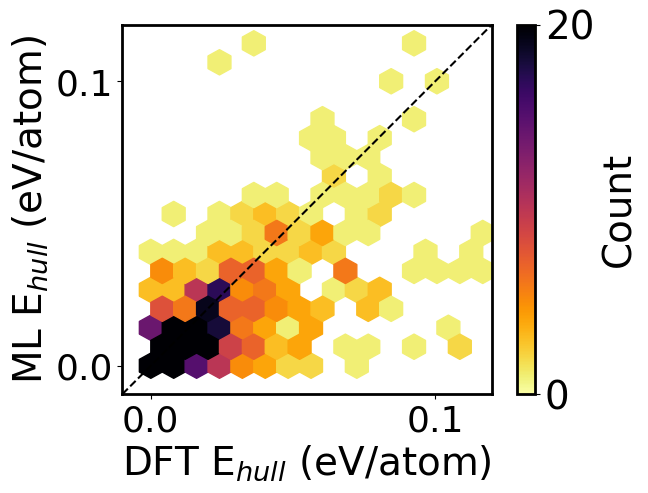

In [95]:
get_relative_plot(ehull_e3nn_M3GNET_held_B,M3Gnet=False)

0.01863993749007339
-0.6106611321872935


/tmp/ipykernel_2323408/2034837187.py:21: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  orig_map=plt.cm.get_cmap('inferno')


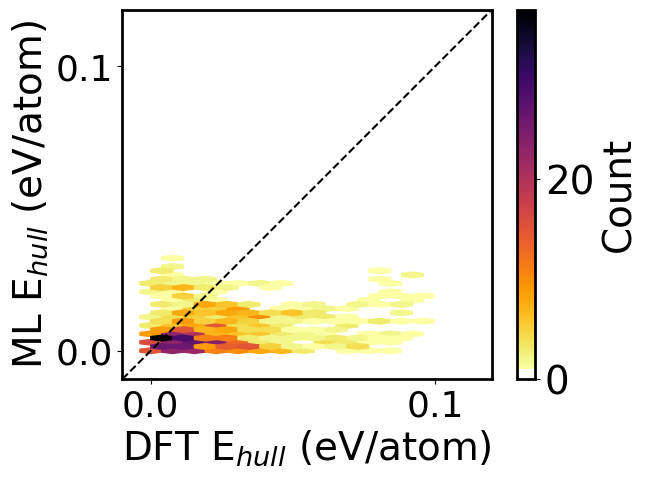

In [115]:
get_emsemble_relative_plot("../../best_models/e3nn/dft_e_hull_htvs_data_unrelaxed_e3nn/837627/","/holdout_set_series_predictions.json")

0.014678849230668211
-0.03458927357920927


/tmp/ipykernel_2323408/2034837187.py:21: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  orig_map=plt.cm.get_cmap('inferno')


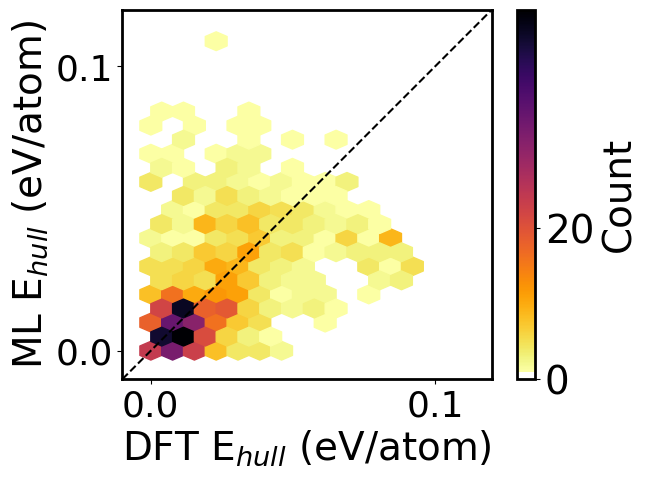

In [116]:
get_emsemble_relative_plot("../../best_models/e3nn/dft_e_hull_htvs_data_relaxed_e3nn/837628/","/holdout_set_series_predictions.json")

0.020897654701815375
-0.966185657885317


/tmp/ipykernel_2323408/2034837187.py:21: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  orig_map=plt.cm.get_cmap('inferno')


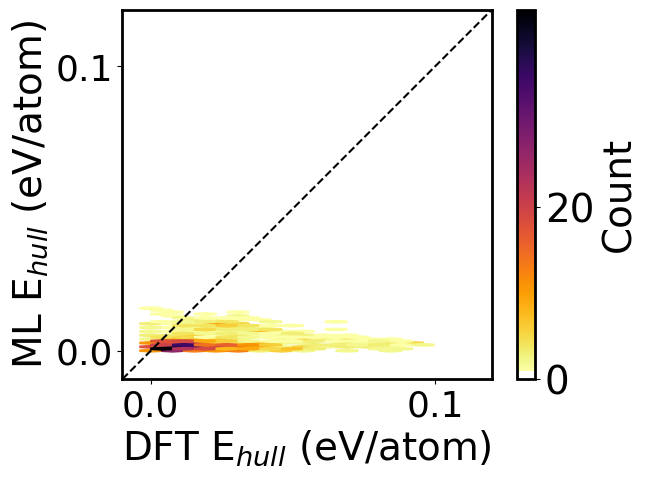

In [117]:
get_emsemble_relative_plot("../../best_models/CGCNN/dft_e_hull_htvs_data_unrelaxed_CGCNN/837611/","/holdout_set_series_predictions.json")

0.01342964999602163
0.19724308869157892


/tmp/ipykernel_2323408/2034837187.py:21: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  orig_map=plt.cm.get_cmap('inferno')


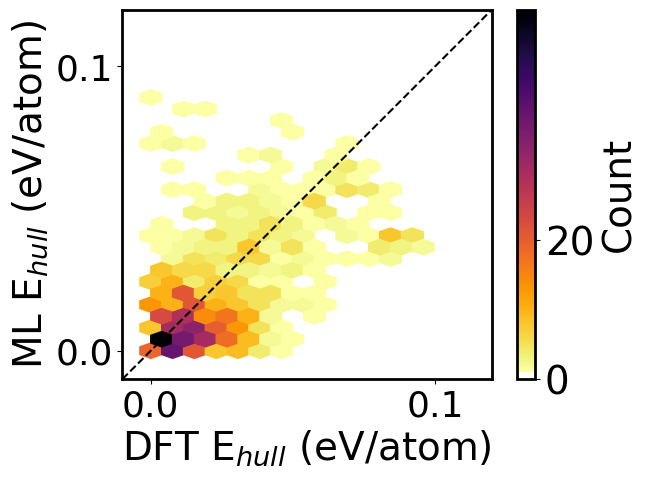

In [118]:
get_emsemble_relative_plot("../../best_models/CGCNN/dft_e_hull_htvs_data_relaxed_CGCNN/837612/","/holdout_set_series_predictions.json")

0.016723332619698727
-0.4362252066509127


/tmp/ipykernel_2323408/2034837187.py:21: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  orig_map=plt.cm.get_cmap('inferno')


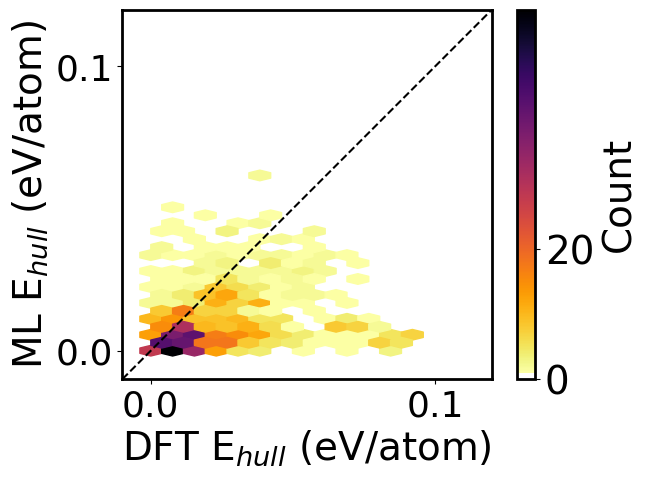

In [119]:
get_emsemble_relative_plot("../../best_models/CGCNN/dft_e_hull_htvs_data_M3Gnet_relaxed_CGCNN/837613/","/holdout_set_series_predictions.json")

0.016220427387022018
-0.32466986835075784


/tmp/ipykernel_2323408/2034837187.py:21: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  orig_map=plt.cm.get_cmap('inferno')


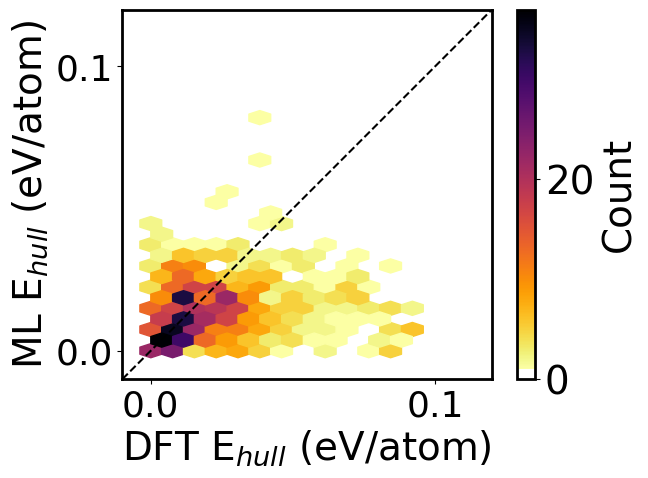

In [120]:
get_emsemble_relative_plot("../../best_models/e3nn/dft_e_hull_htvs_data_M3Gnet_relaxed_e3nn/837629/","/holdout_set_series_predictions.json")

0.017110022233835457
-0.47736738079821817


/tmp/ipykernel_2323408/2034837187.py:21: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  orig_map=plt.cm.get_cmap('inferno')


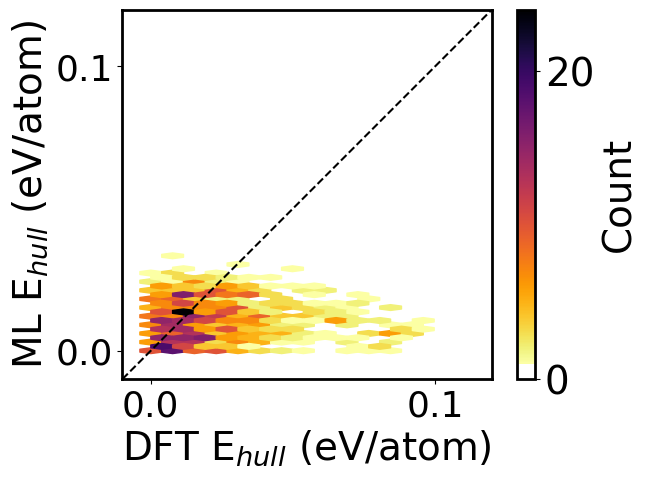

In [121]:
get_emsemble_relative_plot("../../best_models/Painn/dft_e_hull_htvs_data_unrelaxed_Painn/837609/","/holdout_set_series_predictions.json")

0.014106530182277777
0.3727431467273532


/tmp/ipykernel_2323408/2034837187.py:21: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  orig_map=plt.cm.get_cmap('inferno')


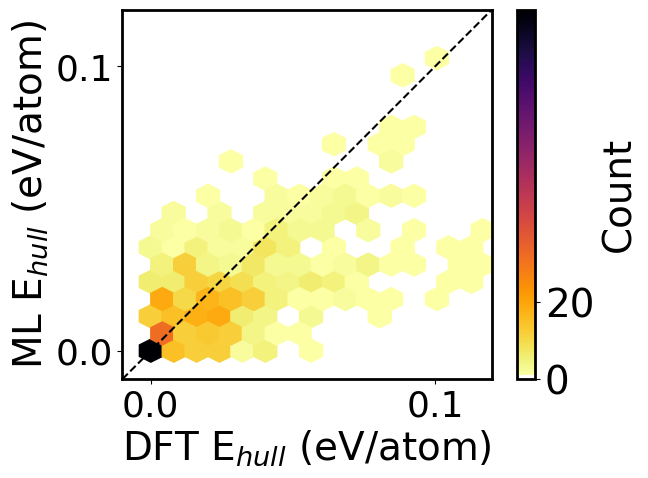

In [123]:
get_emsemble_relative_plot("../../best_models/e3nn/dft_e_hull_htvs_data_unrelaxed_e3nn/837627/","/holdout_set_B_sites_predictions.json")

0.012010692937777779
0.5531636041052306


/tmp/ipykernel_2323408/2034837187.py:21: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  orig_map=plt.cm.get_cmap('inferno')


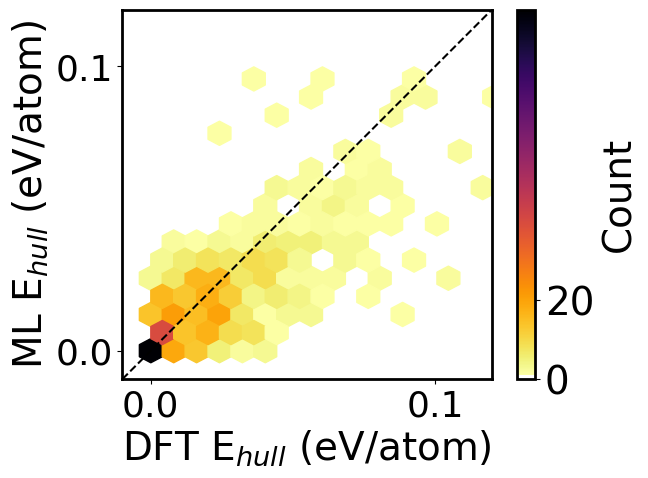

In [124]:
get_emsemble_relative_plot("../../best_models/e3nn/dft_e_hull_htvs_data_relaxed_e3nn/837628/","/holdout_set_B_sites_predictions.json")

0.018800804512333336
-0.1508501450624231


/tmp/ipykernel_2323408/2034837187.py:21: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  orig_map=plt.cm.get_cmap('inferno')


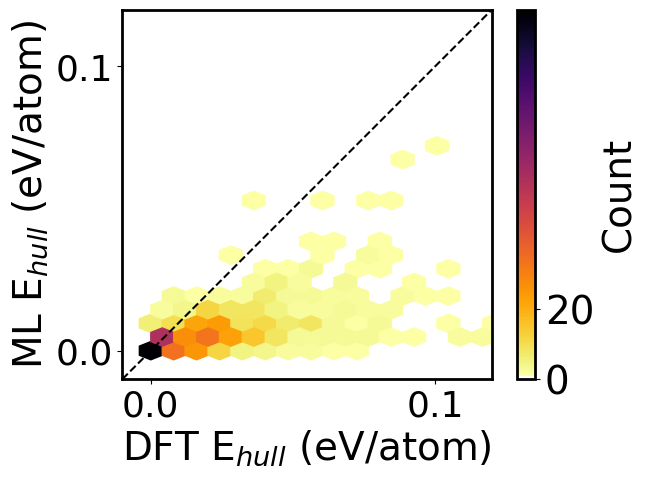

In [125]:
get_emsemble_relative_plot("../../best_models/CGCNN/dft_e_hull_htvs_data_unrelaxed_CGCNN/837611/","/holdout_set_B_sites_predictions.json")

0.017475595835222225
0.11182287656355239


/tmp/ipykernel_2323408/2034837187.py:21: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  orig_map=plt.cm.get_cmap('inferno')


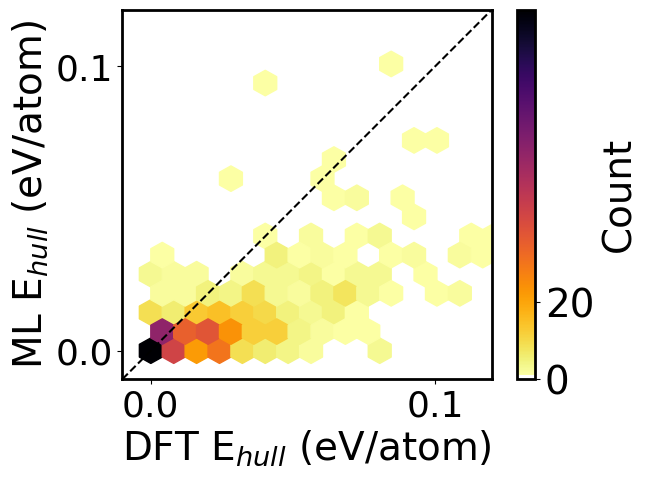

In [126]:
get_emsemble_relative_plot("../../best_models/CGCNN/dft_e_hull_htvs_data_relaxed_CGCNN/837612/","/holdout_set_B_sites_predictions.json")

0.018315406377111113
-0.0724176511380028


/tmp/ipykernel_2323408/2034837187.py:21: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  orig_map=plt.cm.get_cmap('inferno')


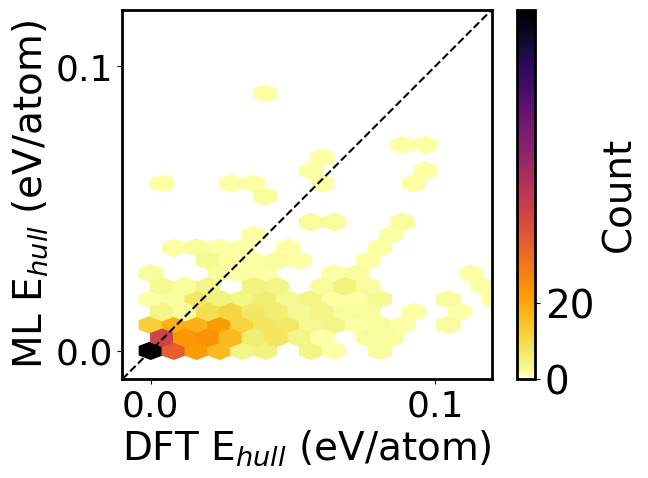

In [127]:
get_emsemble_relative_plot("../../best_models/CGCNN/dft_e_hull_htvs_data_M3Gnet_relaxed_CGCNN/837613/","/holdout_set_B_sites_predictions.json")

0.01377686542127778
0.3761261004210156


/tmp/ipykernel_2323408/2034837187.py:21: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  orig_map=plt.cm.get_cmap('inferno')


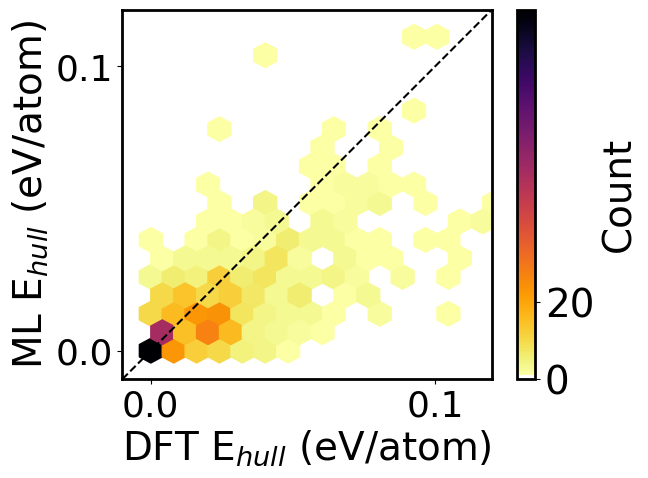

In [128]:
get_emsemble_relative_plot("../../best_models/e3nn/dft_e_hull_htvs_data_M3Gnet_relaxed_e3nn/837629/","/holdout_set_B_sites_predictions.json")

0.014213112065333334
0.2832892066083773


/tmp/ipykernel_2323408/2034837187.py:21: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  orig_map=plt.cm.get_cmap('inferno')


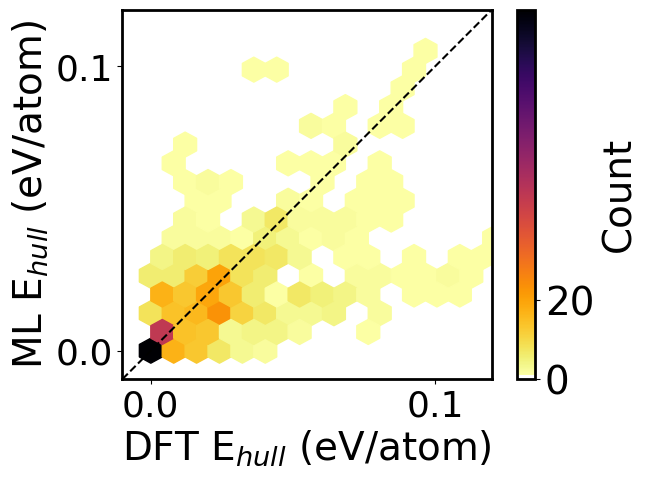

In [129]:
get_emsemble_relative_plot("../../best_models/Painn/dft_e_hull_htvs_data_unrelaxed_Painn/837609/","/holdout_set_B_sites_predictions.json")